In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score



In [99]:
df = pd.read_csv("housing.csv")
df.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [101]:
df.describe()


,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [102]:
df = df.drop(['furnishingstatus','prefarea'], axis=1)

In [103]:
df.head ()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking
0,13300000,7420,4,2,3,yes,no,no,no,yes,2
1,12250000,8960,4,4,4,yes,no,no,no,yes,3
2,12250000,9960,3,2,2,yes,no,yes,no,no,2
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2


In [104]:
df.isnull().sum()  # Check missing values


price              0
area               0
bedrooms           0
bathrooms          0
stories            0
mainroad           0
guestroom          0
basement           0
hotwaterheating    0
airconditioning    0
parking            0
dtype: int64

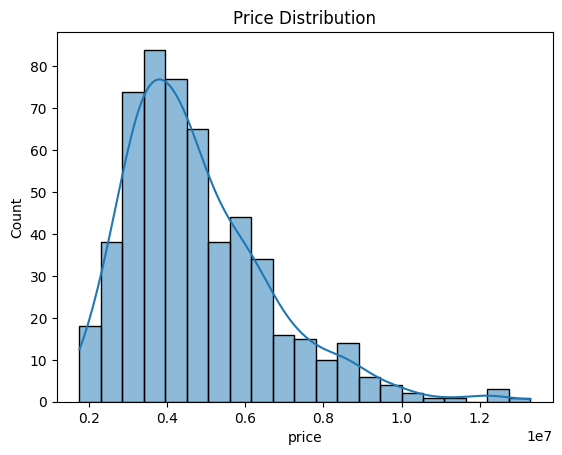

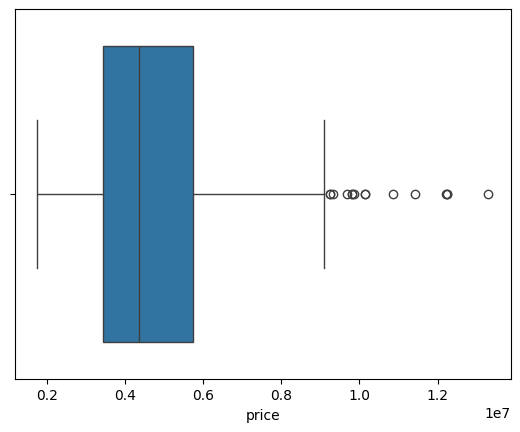

In [105]:
sns.histplot(df['price'], kde=True)
plt.title("Price Distribution")
plt.show()

sns.boxplot(x=df['price'])
plt.show()


mainroad
yes    468
no      77
Name: count, dtype: int64


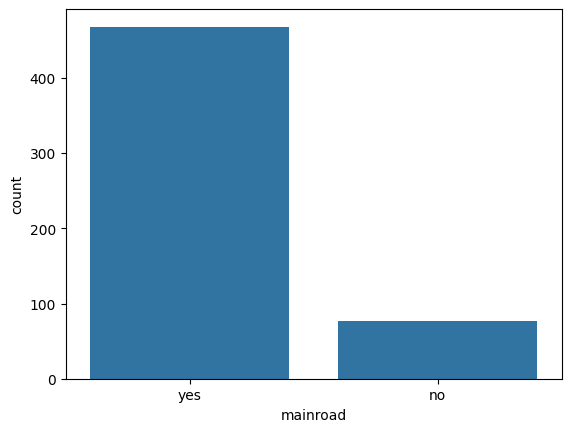

guestroom
no     448
yes     97
Name: count, dtype: int64


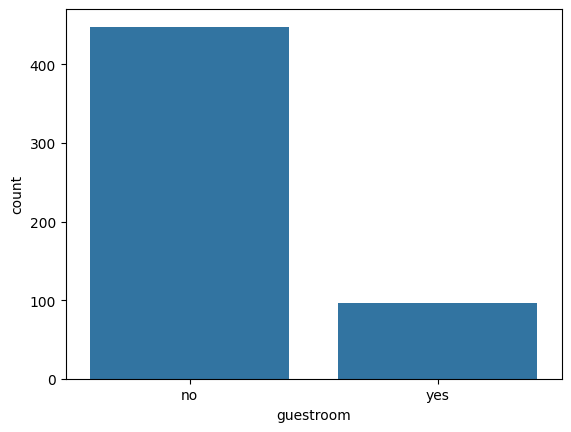

basement
no     354
yes    191
Name: count, dtype: int64


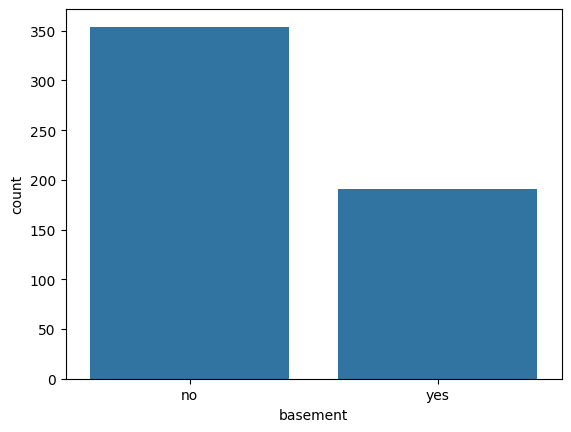

hotwaterheating
no     520
yes     25
Name: count, dtype: int64


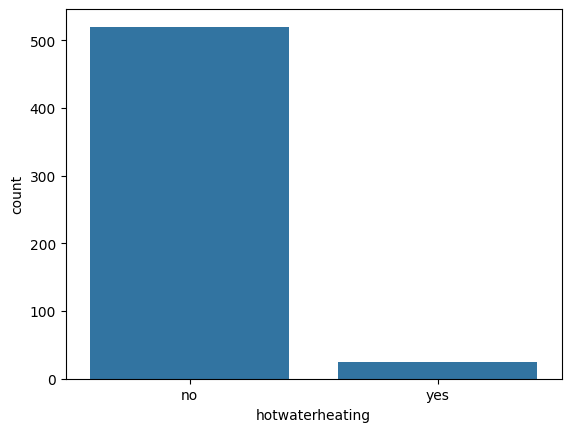

airconditioning
no     373
yes    172
Name: count, dtype: int64


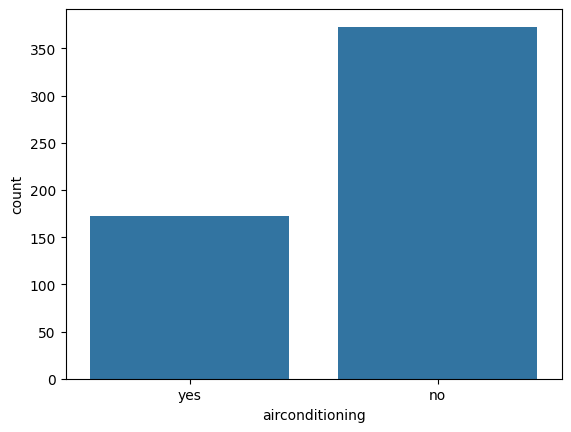

In [106]:
cat_cols = ['mainroad','guestroom','basement','hotwaterheating','airconditioning']
for col in cat_cols:
    print(df[col].value_counts())
    sns.countplot(x=col, data=df)
    plt.show()


In [107]:
#  Check missing values
print(df.isnull().sum())

price              0
area               0
bedrooms           0
bathrooms          0
stories            0
mainroad           0
guestroom          0
basement           0
hotwaterheating    0
airconditioning    0
parking            0
dtype: int64


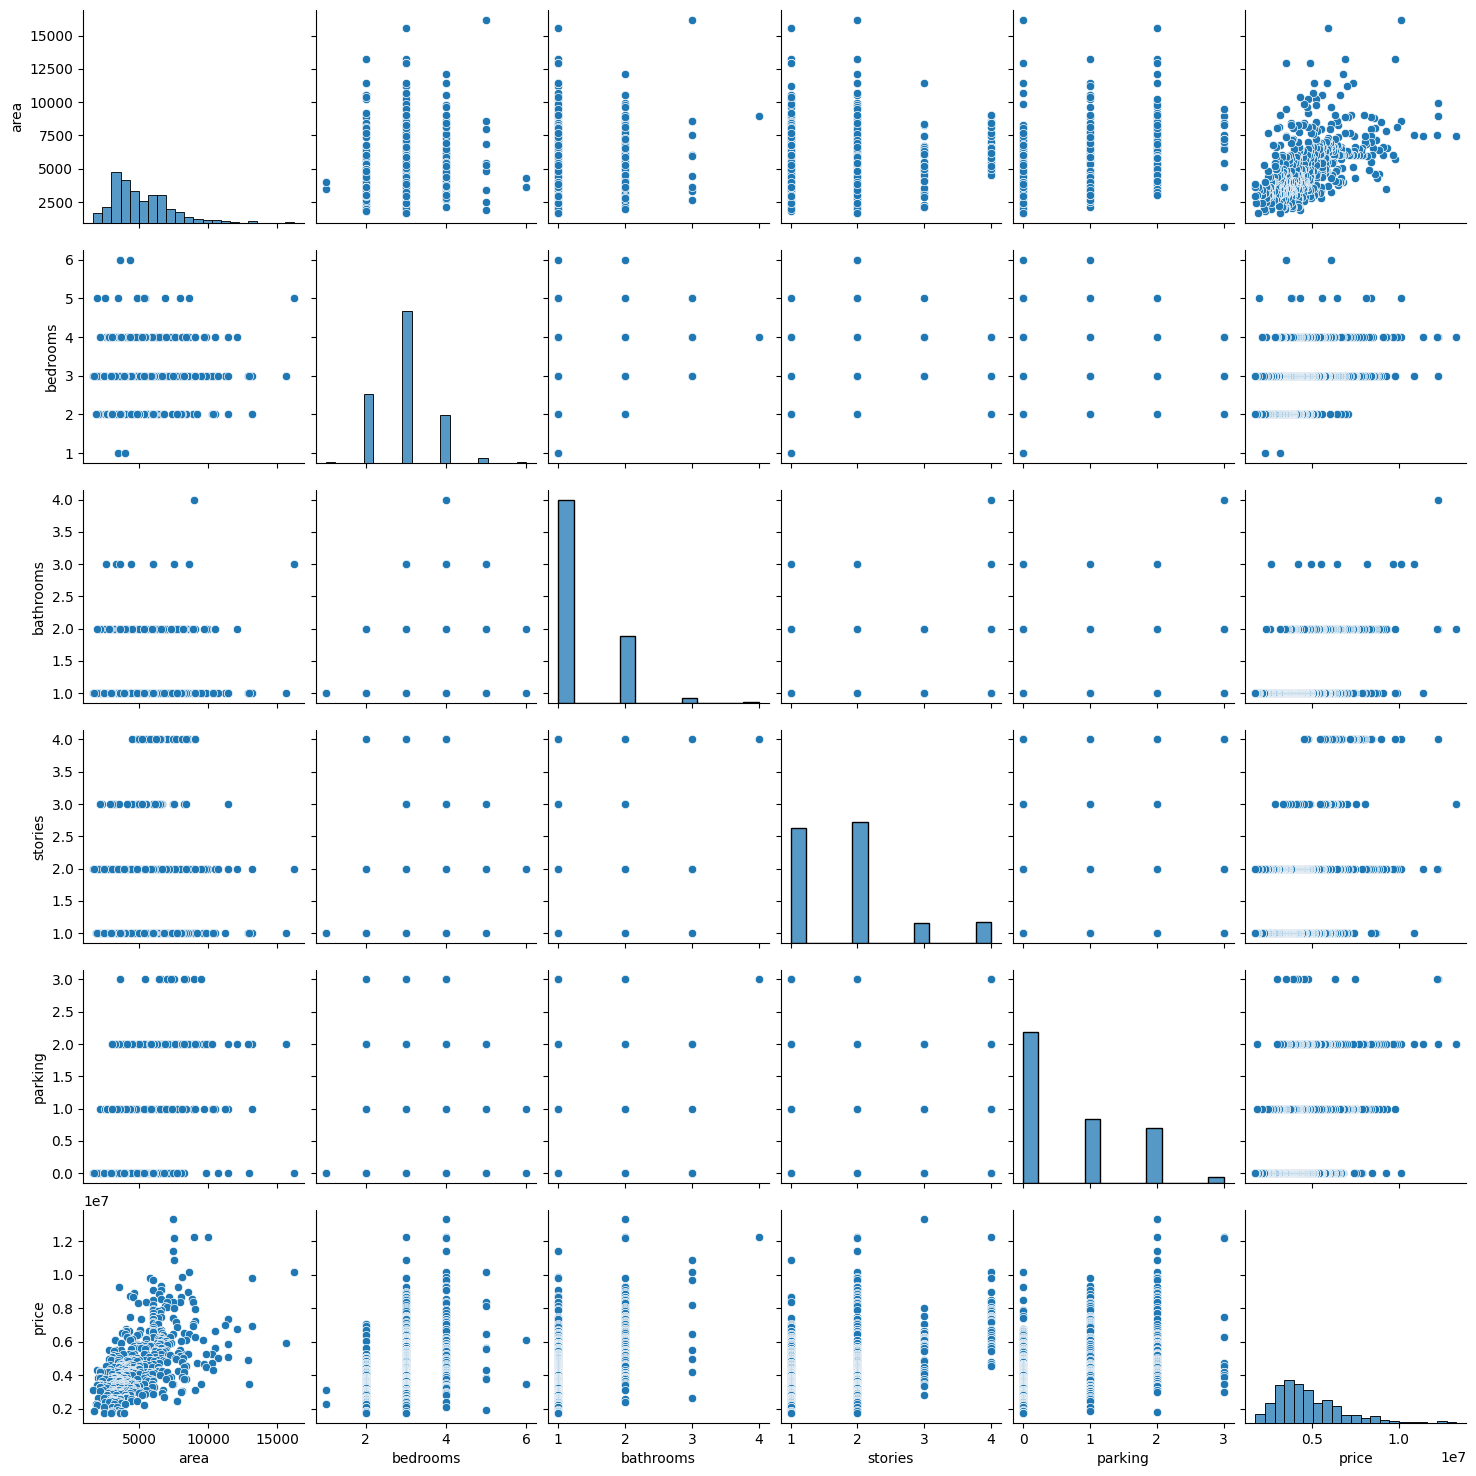

In [108]:
num_cols = ['area','bedrooms','bathrooms','stories','parking']
sns.pairplot(df[num_cols + ['price']])
plt.show()




In [109]:
df.head ()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking
0,13300000,7420,4,2,3,yes,no,no,no,yes,2
1,12250000,8960,4,4,4,yes,no,no,no,yes,3
2,12250000,9960,3,2,2,yes,no,yes,no,no,2
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2


In [117]:
from sklearn.preprocessing import LabelEncoder
cat_value = ['mainroad','guestroom','basement','hotwaterheating','airconditioning']

le = LabelEncoder()

for col in cat_value:
    df[col] = le.fit_transform(df[col])



In [118]:
df.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking
0,13300000,7420,4,2,3,1,0,0,0,1,2
1,12250000,8960,4,4,4,1,0,0,0,1,3
2,12250000,9960,3,2,2,1,0,1,0,0,2
3,12215000,7500,4,2,2,1,0,1,0,1,3
4,11410000,7420,4,1,2,1,1,1,0,1,2


In [119]:
print(df.isnull().sum())

price              0
area               0
bedrooms           0
bathrooms          0
stories            0
mainroad           0
guestroom          0
basement           0
hotwaterheating    0
airconditioning    0
parking            0
dtype: int64


In [120]:
# Features and target
x = df.drop('price', axis=1)
y = df['price'].values.reshape(-1,1)  # reshape for scaler

In [121]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [122]:
# Scale features
scaler_x = StandardScaler()
x_train = scaler_x.fit_transform(x_train)
x_test = scaler_x.transform(x_test)



# Scale target
scaler_y = StandardScaler()
y_train = scaler_y.fit_transform(y_train)
y_test_scaled = scaler_y.transform(y_test)  # use for evaluation





In [ ]:
import pickle
import os


# Feature scaler save
pickle.dump(scaler_x, open("model/scaler_x.pkl", "wb"))

# Save target scaler
pickle.dump(scaler_y, open("model/scaler_y.pkl", "wb"))


In [124]:
# Build neural network
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(x_train.shape[1],)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(1, activation='linear'))  # linear for regression

In [125]:
# Compile model
model.compile(
    optimizer=Adam(learning_rate=0.0005),  # slightly lower lr for stable training
    loss='mse',
    metrics=['mae']
)

# Train model
history = model.fit(
    x_train, y_train,
    validation_split=0.1,
    epochs=200,
    batch_size=32,
    verbose=1
)

Epoch 1/200
13/13 [==============================] - 5s 44ms/step - loss: 3.0028 - mae: 1.3377 - val_loss: 0.7532 - val_mae: 0.7157
Epoch 2/200
13/13 [==============================] - 0s 12ms/step - loss: 2.2681 - mae: 1.1753 - val_loss: 0.6240 - val_mae: 0.6343
Epoch 3/200
13/13 [==============================] - 0s 12ms/step - loss: 1.7845 - mae: 1.0660 - val_loss: 0.5558 - val_mae: 0.5792
Epoch 4/200
13/13 [==============================] - 0s 12ms/step - loss: 1.3595 - mae: 0.9089 - val_loss: 0.5367 - val_mae: 0.5572
Epoch 5/200
13/13 [==============================] - 0s 11ms/step - loss: 1.7016 - mae: 1.0039 - val_loss: 0.5180 - val_mae: 0.5415
Epoch 6/200
13/13 [==============================] - 0s 12ms/step - loss: 1.4974 - mae: 0.9555 - val_loss: 0.5159 - val_mae: 0.5392
Epoch 7/200
13/13 [==============================] - 0s 12ms/step - loss: 1.3793 - mae: 0.9062 - val_loss: 0.5022 - val_mae: 0.5252
Epoch 8/200
13/13 [==============================] - 0s 11ms/step - loss: 1.

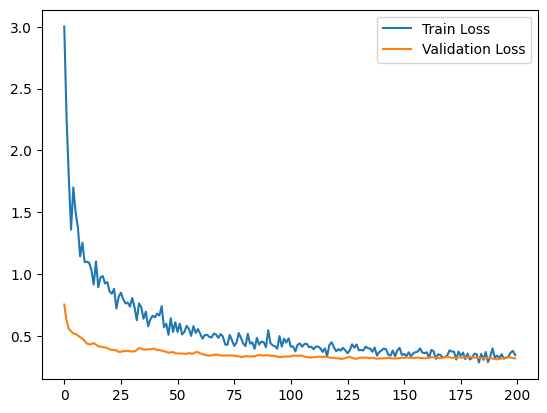

In [126]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()


In [127]:
# Predict and inverse scale
y_pred_scaled = model.predict(x_test)
y_pred = scaler_y.inverse_transform(y_pred_scaled)

# Metrics
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

4/4 [==============================] - 0s 4ms/step
MAE: 1033546.5625
MSE: 1997511327744.0
R2 Score: 0.6048108339309692


In [128]:
model.save("model/house_model.h5")


c:\Users\Rohit\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
